In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import pickle

In [3]:
with open("ho8-results.pickle","rb") as inf:
    background_frequencies,kmer_freq,log_odds,discrimination = pickle.load(inf)

In [4]:
k_list = [2,3,4,6]

In [5]:
background_frequencies

Counter({'A': 0.2156571373714505,
         'C': 0.26542893828424685,
         'G': 0.28748385006459976,
         'T': 0.23143007427970289})

In [6]:
kmer_freq[2]

{'sensitive': Counter({'AA': 0.07429992232481042,
          'AC': 0.047852321046773276,
          'AG': 0.07112484885369037,
          'AT': 0.04977017753185083,
          'CA': 0.06226026793936531,
          'CC': 0.07539298040503208,
          'CG': 0.040341050136532164,
          'CT': 0.06983560086163407,
          'GA': 0.061701727271999296,
          'GC': 0.06648836073318973,
          'GG': 0.08019562936922942,
          'GT': 0.05193227043778378,
          'TA': 0.044897460741998255,
          'TC': 0.057966111195637375,
          'TG': 0.06859640131647435,
          'TT': 0.07734486983399931}),
 'insensitive': Counter({'AA': 0.04417676310668727,
          'AC': 0.04056326524075305,
          'AG': 0.07080053491780043,
          'AT': 0.03262157768720121,
          'CA': 0.05348977810520584,
          'CC': 0.09501197158849767,
          'CG': 0.06269468845842775,
          'CT': 0.07189159106014623,
          'GA': 0.06195397144435814,
          'GC': 0.08892207657011987,
   

In [7]:
log_odds[2]

{'sensitive': {'AA': 0.6758817741658929,
  'AC': -0.2584762292925918,
  'AG': 0.1981333051117996,
  'AT': -0.004034285502281399,
  'CA': 0.12124665279415558,
  'CC': 0.09777886803821711,
  'CG': -0.9195579409126051,
  'CT': 0.185060659444991,
  'GA': -0.00690949986081586,
  'GC': -0.19870477226333094,
  'GG': -0.043438212057074675,
  'GT': -0.3574259664726365,
  'TA': -0.1526819656495606,
  'TC': -0.08369232103528618,
  'TG': 0.044075625392117526,
  'TT': 0.530152894141335},
 'insensitive': {'AA': -0.07419121408633352,
  'AC': -0.49689134238253907,
  'AG': 0.19153988385121878,
  'AT': -0.6134892614342742,
  'CA': -0.09780191383800953,
  'CC': 0.431457968617937,
  'CG': -0.2834633588279521,
  'CT': 0.22692100988073785,
  'GA': -0.001023609843642855,
  'GC': 0.22073505876125546,
  'GG': 0.4247119254008043,
  'GT': -0.3309749898846366,
  'TA': -0.8007941277051082,
  'TC': -0.06995627878491398,
  'TG': 0.07687786051492328,
  'TT': 0.08216764325445555}}

In [8]:
discrimination[2]

{'AA': 0.7500729882522265,
 'AC': 0.23841511308994728,
 'AG': 0.006593421260580823,
 'AT': 0.6094549759319928,
 'CA': 0.2190485666321651,
 'CC': -0.3336791005797199,
 'CG': -0.6360945820846531,
 'CT': -0.041860350435746846,
 'GA': -0.005885890017173005,
 'GC': -0.4194398310245864,
 'GG': -0.468150137457879,
 'GT': -0.02645097658799994,
 'TA': 0.6481121620555476,
 'TC': -0.013736042250372199,
 'TG': -0.03280223512280575,
 'TT': 0.44798525088687946}

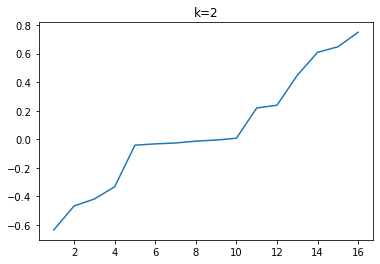

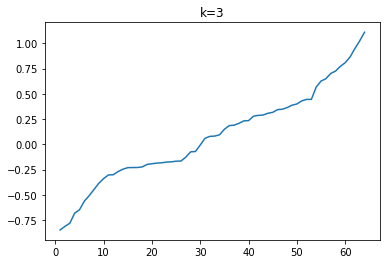

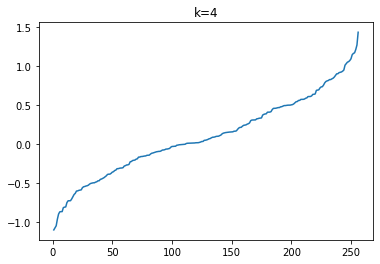

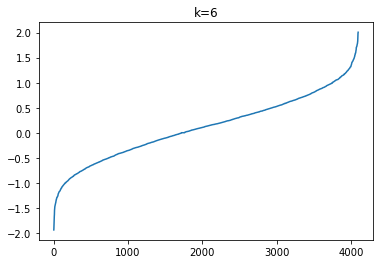

In [9]:
for k in k_list:
    sorted_discr = sorted(discrimination[k].values())
    x = list(range(1,len(sorted_discr)+1))
    plt.plot(x,sorted_discr)
    plt.title(f"k={k}")
    plt.show()

In [33]:
seqs = ['ATCGATCG', 'ATCGGGCG', 'ATCTTTCG']  



In [ ]:
def get_kmers(seq,k):
    return (seq[i:i+k]for i in range(len(seq)-k+1))

def init_counter(k):
    counter=Counter()
    for kmer in itertools.product('AGCT',repeat=k):
        counter[''.join(kmer)]=1
    return counter
def kmer_frequencies(seqs,k):
    counter=init_counter(k)
    for seq in seqs:
        for kmer in get_kmers(seq,k):
            counter[kmer]+=1
    total=sum(counter.values())
    for k in counter:
        counter[k]/=total
    return counter

In [35]:
kmer_frequencies(seqs,2)

Counter({'AA': 0.02702702702702703,
         'AG': 0.02702702702702703,
         'AC': 0.02702702702702703,
         'AT': 0.13513513513513514,
         'GA': 0.05405405405405406,
         'GG': 0.08108108108108109,
         'GC': 0.05405405405405406,
         'GT': 0.02702702702702703,
         'CA': 0.02702702702702703,
         'CG': 0.16216216216216217,
         'CC': 0.02702702702702703,
         'CT': 0.05405405405405406,
         'TA': 0.02702702702702703,
         'TG': 0.02702702702702703,
         'TC': 0.16216216216216217,
         'TT': 0.08108108108108109})

In [36]:

def kmer_(seqs,k):
    counter=Counter()
    for kmer in itertools.product('AGCT',repeat=k):
        counter[''.join(kmer)]=1
    for seq in seqs:
        for kmer in (seq[i:i+k]for i in range(len(seq)-k+1)):
            counter[kmer]+=1
    total=sum(counter.values())
    for k in counter:
        counter[k]/=total
    return counter

In [37]:
kmer_(seqs,2)

Counter({'AA': 0.02702702702702703,
         'AG': 0.02702702702702703,
         'AC': 0.02702702702702703,
         'AT': 0.13513513513513514,
         'GA': 0.05405405405405406,
         'GG': 0.08108108108108109,
         'GC': 0.05405405405405406,
         'GT': 0.02702702702702703,
         'CA': 0.02702702702702703,
         'CG': 0.16216216216216217,
         'CC': 0.02702702702702703,
         'CT': 0.05405405405405406,
         'TA': 0.02702702702702703,
         'TG': 0.02702702702702703,
         'TC': 0.16216216216216217,
         'TT': 0.08108108108108109})